In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [39]:
fv,cv=make_regression(n_samples=1000,n_features=10,n_targets=1,n_informative=8)

In [40]:
fv.shape

(1000, 10)

In [41]:
cv.shape

(1000,)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.1,random_state=1)

In [43]:
x_train.shape

(800, 10)

In [44]:
y_train.shape

(800,)

In [45]:
x_test.shape

(200, 10)

<ipython-input-46-56e041dd2a1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(fv)[8])


<Axes: xlabel='8', ylabel='Density'>

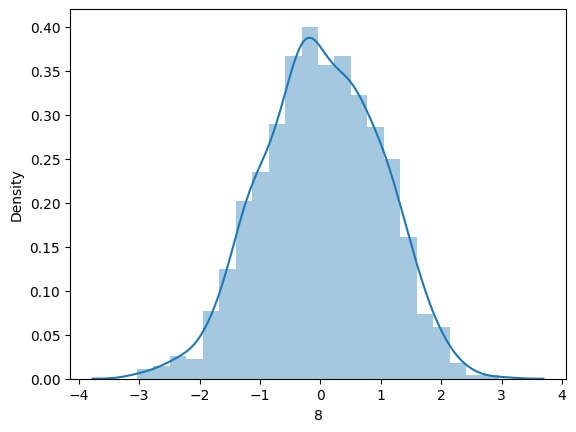

In [46]:
sns.distplot(pd.DataFrame(fv)[8])

In [47]:
std=StandardScaler()
x_trainf=std.fit_transform(x_trainf)
x_cv=std.transform(x_cv)
x_test=std.transform(x_test)

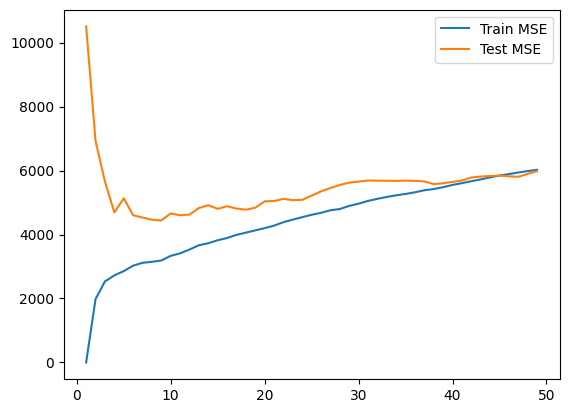

In [48]:
k=[]
Train_mse=[]
Test_mse=[]

for i in range(1,50):
  knn=KNeighborsRegressor(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  y_pred=model.predict(x_trainf)
  Train_mse.append(mean_squared_error(y_trainf,y_pred))

  y_pred=model.predict(x_cv)
  Test_mse.append(mean_squared_error(y_cv,y_pred))
  k.append(i)

plt.plot(k,Train_mse,label='Train MSE')
plt.plot(k,Test_mse,label='Test MSE')
plt.legend()
plt.show()

In [49]:
k=[]
mse=[]
mae=[]
r2score=[]

for i in range(10,20):
  knn=KNeighborsRegressor(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  y_pred=model.predict(x_cv)
  k.append(i)
  mse.append(mean_squared_error(y_cv,y_pred))
  mae.append(mean_absolute_error(y_cv,y_pred))
  r2score.append(r2_score(y_cv,y_pred))


In [50]:
k

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [51]:
mse

[4658.530081735603,
 4599.050334643669,
 4623.435269528981,
 4827.3757457422425,
 4913.985440298657,
 4803.015252652095,
 4882.758754981272,
 4811.811980765806,
 4775.706584999522,
 4837.093095584995]

In [52]:
mae

[52.89088104897384,
 52.51689125565954,
 51.87532547967834,
 53.276184473800754,
 53.72565811121145,
 52.61010896316617,
 52.52812105881786,
 52.08606643523782,
 51.88036324060501,
 52.87614090827229]

In [53]:
knn=KNeighborsRegressor(n_neighbors=12)
model=knn.fit(x_trainf,y_trainf)
y_pred=model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

50.092647151021744
4299.673408438569
0.8040253911645776


RMSE:-

In [54]:
import math
def rmse_(y_test,y_pred):
  mse=mean_squared_error(y_test,y_pred)
  rmse=math.sqrt(mse)
  return rmse

In [55]:
rmse_(y_test,y_pred)

65.57189495842384

Adjusted r2score:-

In [56]:
fv,cv=make_regression(n_samples=1000,n_features=10,n_targets=1,n_informative=0)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1)

In [58]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [59]:
def adjusted_r2_score(y_test,y_pred,n,k):
  r2score=r2_score(y_test,y_pred)
  adjusted_r2score=1-((1-r2score)*(n-1)/(n-k-1))
  return adjusted_r2score

In [60]:
n=x_test.shape[0]
k=x_test.shape[1]
knn=KNeighborsRegressor(n_neighbors=12)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)
adjusted_r2_score(y_test,y_pred,n,k)

1.0

In [61]:
# Mean Model:-
mean_y_train=np.mean(y_train)
m_y_pred=np.full((200),mean_y_train)
adjusted_r2_score(y_test,m_y_pred,200,10)

1.0

In [62]:
fv,cv=make_regression(n_samples=1000,n_features=10,n_targets=1,n_informative=1)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1)

In [64]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [65]:
n=x_test.shape[0]
k=x_test.shape[1]
knn=KNeighborsRegressor(n_neighbors=12)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)
adjusted_r2_score(y_test,y_pred,n,k)

0.8024970494050776

In [66]:
# Mean Model:-
fv,cv=make_regression(n_samples=1000,n_features=10,n_targets=1,n_informative=2)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1)

In [68]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [69]:
n=x_train.shape[0]
k=x_test.shape[1]
knn=KNeighborsRegressor(n_neighbors=12)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)
adjusted_r2_score(y_test,y_pred,n,k)

0.7672775265708485

In [70]:
# Mean Model:-
mean_y_train=np.mean(y_train)
m_y_pred=np.full((200),mean_y_train)
adjusted_r2_score(y_test,m_y_pred,200,10)

-0.05328872629000081

In [71]:
fv,cv=make_regression(n_samples=1000,n_features=10,n_targets=1,n_informative=3)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1)

In [73]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [75]:
n=x_test.shape[0]
k=x_test.shape[1]
knn=KNeighborsRegressor(n_neighbors=12)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)
adjusted_r2_score(y_test,y_pred,n,k)

0.7843127542756047

In [77]:
# Mean Model:-
mean_y_train=np.mean(y_train)
m_y_pred=np.full((200),mean_y_train)
adjusted_r2_score(y_test,m_y_pred,200,10)

-0.062338446791715185